In [3]:
import pandas as pd
import numpy as np

## Stats on Output and Citation

## http://www.ref.ac.uk/2014/about/guidance/citationdata/
## citations were provided by Elsevier who own Scopus and thus the data is from Scopus

# Load and clean the output file
output_or = pd.read_csv("REF2014Data_output.csv")


# Clear the dataframe to include only values required
output = output_or.drop(output_or.columns[[range(1,27)]], axis=1)
output = output.drop(output.columns[[2,3,4]], axis=1)
# drop all columns that do not contain a value
output = output.dropna()

# Obtain the average citation by count for each UKPRN
unis = output["UKPRN"].unique()

# Total citations per UKPRN
tot_cit = {}

for uni in unis:
    for index, row in output.iterrows():
        #print(row['UKPRN'], row['CitedByCount'])
        if uni == row["UKPRN"]:
            if uni not in tot_cit:
                tot_cit[uni] = row['CitedByCount']
            else:
                tot_cit[uni] += row['CitedByCount']
tot_cit              

{10003270: 21269.0,
 10003645: 3352.0,
 10003957: 3195.0,
 10004113: 938.0,
 10005343: 4269.0,
 10005553: 2712.0,
 10006840: 8486.0,
 10006842: 6130.0,
 10007141: 1134.0,
 10007143: 12485.0,
 10007147: 3481.0,
 10007148: 390.0,
 10007150: 495.0,
 10007154: 6243.0,
 10007155: 3417.0,
 10007157: 5959.0,
 10007158: 6623.0,
 10007160: 1672.0,
 10007163: 7952.0,
 10007167: 2746.0,
 10007764: 2460.0,
 10007767: 2006.0,
 10007768: 6396.0,
 10007774: 29268.0,
 10007775: 5063.0,
 10007784: 14849.0,
 10007786: 6619.0,
 10007788: 21124.0,
 10007790: 9111.0,
 10007792: 5227.0,
 10007794: 6827.0,
 10007795: 1874.0,
 10007796: 5017.0,
 10007798: 12030.0,
 10007803: 6683.0,
 10007805: 3164.0,
 10007806: 4984.0,
 10007814: 4186.0,
 10007850: 2324.0,
 10007855: 1283.0,
 10007856: 523.0}

In [2]:
## CHECKS

len(unis) == len(tot_cit)

True

In [3]:
# Load the submission profile file and clean it
sub_prof_or = pd.read_csv("REF2014Data_submissionprofile.csv")

# Keep only rows of overall score
subprof = sub_prof_or[sub_prof_or["Profile"].str.contains("Overall")]

# Drop irrelevant columns
subprof = sub_prof_or.drop(sub_prof_or.columns[[1,2,3,5,6,7,8]], axis=1)

# Find the average four star for each uni

tot_fourst = {}
len_uni = {}

for uni in unis:
    for index, row in subprof.iterrows():
        #print(row['UKPRN'], row['CitedByCount'])
        if uni == row["UKPRN"]:
            if uni not in len_uni:
                len_uni[uni] = 1
            else:
                len_uni[uni] += 1
                
            if uni not in tot_fourst:
                tot_fourst[uni] = row['FourStar']
            else:
                tot_fourst[uni] += row['FourStar']
av = {}

for uni in tot_fourst:
    for univ in len_uni:
        if univ == uni:
            av[uni] = tot_fourst[uni]/len_uni[univ]

len(av)

41

In [4]:
## CHECKS

len(unis) == len(av)

True

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

ava = list(av.values())
totcita = list(tot_cit.values())

        

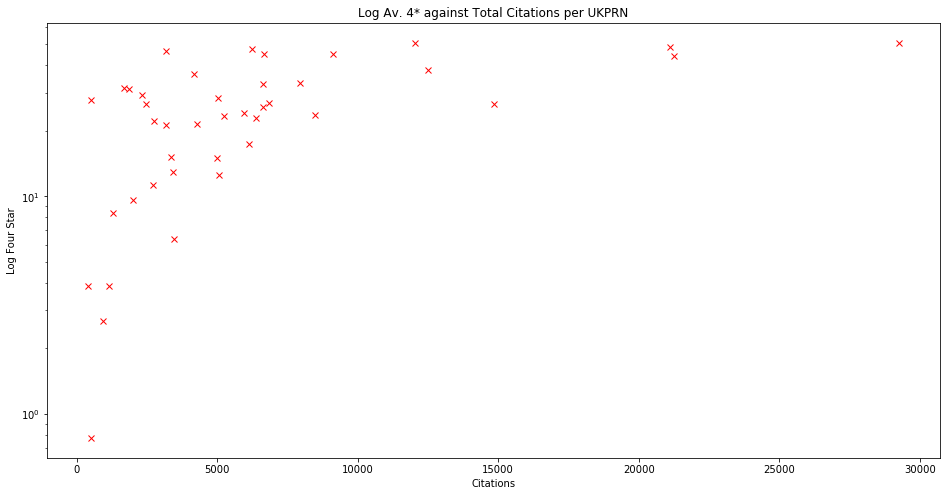

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale('log')
plt.plot(totcita, ava, "rx")
plt.title("Log Av. 4* against Total Citations per UKPRN")
ax.set(xlabel = "Citations", ylabel = "Log Four Star")

plt.savefig("Cit 4*")


There appears to be a relationship, need to check correlation between two values

In [7]:
## Check with three star

# Keep only rows of overall score
subproft = sub_prof_or[sub_prof_or["Profile"].str.contains("Overall")]

# Drop irrelevant columns
subproft = sub_prof_or.drop(sub_prof_or.columns[[1,2,3,4,6,7,8]], axis=1)

# Find the average three star for each uni

tot_three = {}
len_uni = {}

for unit in unis:
    for index, row in subproft.iterrows():
        #print(row['UKPRN'], row['CitedByCount'])
        if unit == row["UKPRN"]:
            if unit not in len_uni:
                len_uni[unit] = 1
            else:
                len_uni[unit] += 1
                
            if unit not in tot_three:
                tot_three[unit] = row['ThreeStar']
            else:
                tot_three[unit] += row['ThreeStar']
avt = {}

for uni in tot_three:
    for univ in len_uni:
        if univ == uni:
            avt[uni] = tot_three[uni]/len_uni[univ]
        

In [8]:
## CHECKs
len(unis) == len(av)

True

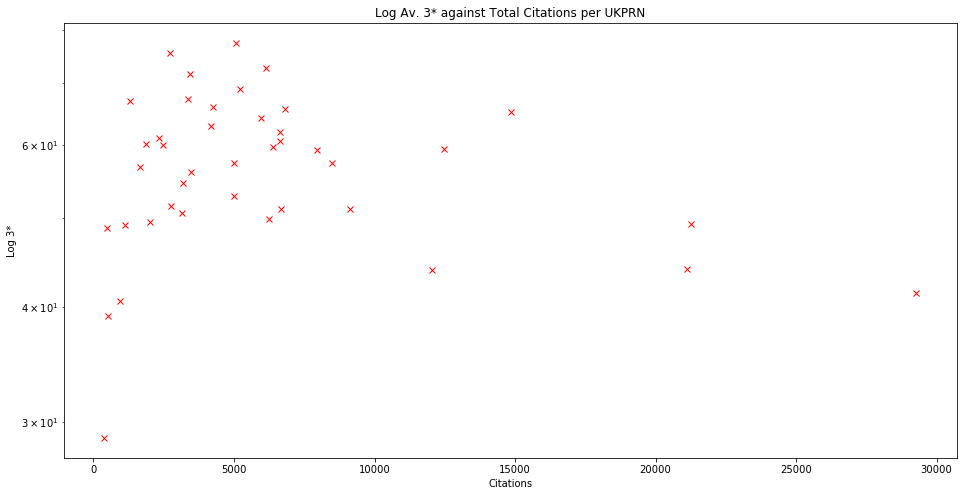

In [9]:
avta = list(avt.values())

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale('log')
plt.plot(totcita, avta, "rx")
plt.title("Log Av. 3* against Total Citations per UKPRN")
ax.set(xlabel = "Citations", ylabel = "Log 3*")


plt.savefig("Cit 3*")

## Now compare av. four star to research income

In [10]:
# Load the submission profile file and clean it
resinc_or = pd.read_csv("REF2014Data_researchincome.csv")

# Drop irrelevant columns
resinc = resinc_or.drop(resinc_or.columns[[1,2,3]], axis=1)

resinc_col_list = list(resinc)

resinc_col_list.remove('UKPRN') 

resinc['TotalInc'] = resinc[resinc_col_list].sum(axis=1)

tot_inc = {}

for item in unis:
    for index, row in resinc.iterrows():
        # return total income normalised
        if item == row["UKPRN"]:
            if item not in tot_inc:
                tot_inc[item] = row['TotalInc']/1000000
            else:
                tot_inc[item] += row['TotalInc']/1000000


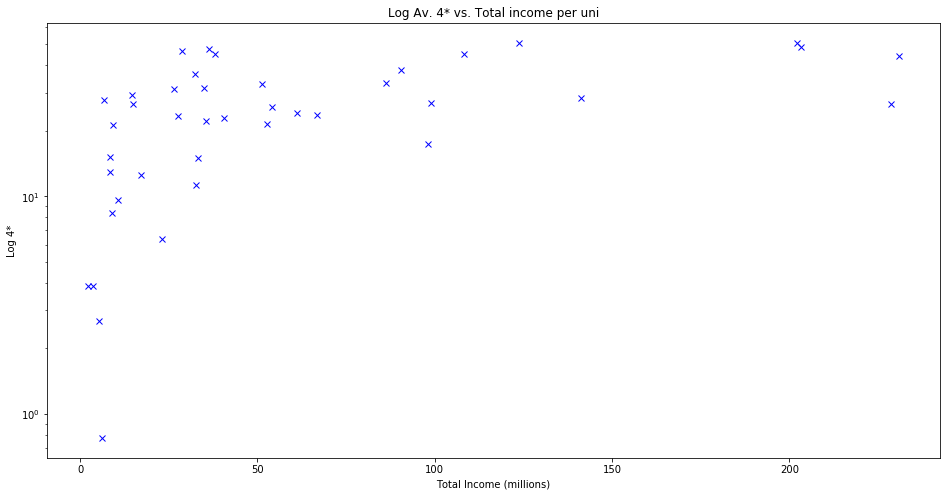

In [11]:
tot_inc_l = list(tot_inc.values())

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot(tot_inc_l, ava, "bx")
plt.title("Log Av. 4* vs. Total income per uni")
ax.set(xlabel = "Total Income (millions)", ylabel = "Log 4*")

plt.savefig("Inc4*")

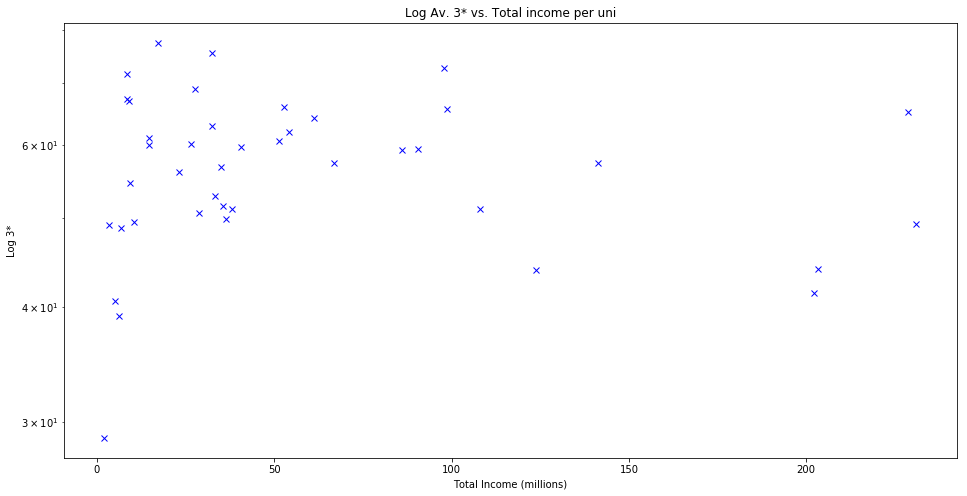

In [12]:
plt.figure("Inc3*")
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot(tot_inc_l, avta, "bx")
plt.title("Log Av. 3* vs. Total income per uni")
ax.set(xlabel = "Total Income (millions)", ylabel = "Log 3*")

plt.savefig("Inc3*")

In [13]:
from scipy.stats.stats import pearsonr
# Correlation Income vs Four Str
pearsonr(tot_inc_l, ava)

(0.57928880939669525, 7.2349612082725793e-05)

In [14]:
# Correlation Citations vs Four Str
pearsonr(totcita, ava)

(0.63629657404582196, 7.7700231634952631e-06)